# Exercise1-4

# Import Library

In [0]:
# Common imports
import numpy as np
import os

# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# To import Excel
import pandas as pd

# scikit-learn
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Import Excel

In [0]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving Ridge_Lasso.xlsx to Ridge_Lasso.xlsx


# Read Excel

In [0]:
data = pd.read_excel('Ridge_Lasso.xlsx', sheet_name='Sheet1')
X=np.array(data['x']).reshape(-1,1)
y=np.array(data['y']).reshape(-1,1)

# Plot Data

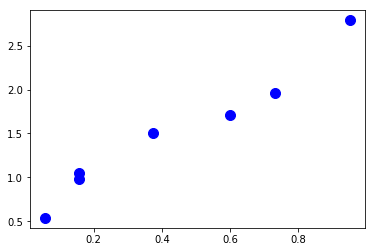

In [0]:
plt.plot(X, y, "b.", ms=20)

# Polynomial regression (degree=6)
# Overfitting!

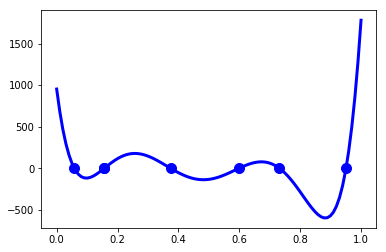

In [0]:
from sklearn.pipeline import Pipeline
model = LinearRegression()
model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=6, include_bias=False)),        
        ("regul_reg", model),
        ])
model.fit(X, y)

X_new = np.linspace(0, 1, 100).reshape(100, 1)
y_new_regul = model.predict(X_new)

plt.plot(X, y, "b.", ms=20)
plt.plot(X_new, y_new_regul,'b-', linewidth=3)
#plt.ylim(0.5,3.0)

# Rigde regression

* $\Large \alpha \sum | \theta |$

* $\Large \alpha=0.1$

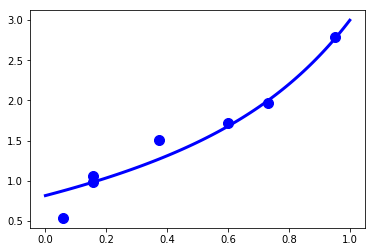

In [0]:
from sklearn.linear_model import Ridge
model1 = Ridge(0.1)
model1 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
        ("regul_reg", model1),
        ])
model1.fit(X, y)

X_new = np.linspace(0, 1, 100).reshape(100, 1)
y_new_regul = model1.predict(X_new)

plt.plot(X, y, "b.", ms=20)
plt.plot(X_new, y_new_regul,'b-', linewidth=3)

In [0]:
print('Intercept:{0}'.format(model1.named_steps.regul_reg.intercept_) )
print('Coef:{0}'.format(model1.named_steps.regul_reg.coef_) )

Intercept:[0.81514591]
Coef:[[0.98818997 0.48484381 0.2583069  0.17414165 0.14390557 0.13316531]]


# Lasso regression

* $\Large \alpha \sum  \theta^2$

* $\Large \alpha=0.001$

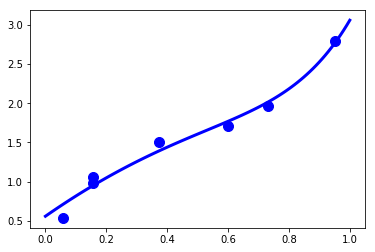

In [0]:
from sklearn.linear_model import Lasso

model2 = Lasso(0.001)
model2 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
        ("regul_reg", model2),
        ])
model2.fit(X, y)

X_new = np.linspace(0, 1, 100).reshape(100, 1)
y_new_regul = model2.predict(X_new)

plt.plot(X, y, "b.", ms=20)
plt.plot(X_new, y_new_regul,'b-', linewidth=3)

In [0]:
print('Intercept:{0}'.format(model2.named_steps.regul_reg.intercept_) )
print('Coef:{0}'.format(model2.named_steps.regul_reg.coef_) )

Intercept:[0.55869728]
Coef:[ 2.70250582 -1.28124151 -0.         -0.          0.          1.07840371]
